# Analyzing the data

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import MACD, SMAIndicator, EMAIndicator, PSARIndicator
from ta.volume import OnBalanceVolumeIndicator

In [53]:
df = pd.read_csv("../data/Final_Btc_Data.csv")

In [54]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,EPU,GPRD,Gold
0,2014-04-01,463.5,444.7,487.4,438.0,3970.0,0.0423,111.578388,120.928154,1279.599976
1,2014-04-02,424.4,463.5,480.3,409.3,4380.0,-0.0843,111.578388,94.748909,1290.500000
2,2014-04-03,436.3,424.4,448.7,386.7,4020.0,0.0281,111.578388,63.297474,1284.400024
3,2014-04-04,444.4,436.3,456.5,415.5,2570.0,0.0185,111.578388,59.551781,1303.199951
4,2014-04-05,456.6,444.4,461.2,439.4,1160.0,0.0276,111.578388,60.448311,1303.199951


In [55]:
df.describe()

,Price,Open,High,Low,Vol.,Change %,EPU,GPRD,Gold
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,14907.399261,14888.546853,15256.823481,14496.016311,173785.530925,0.002082,202.899414,103.866638,1510.117514
std,17145.417080,17123.192230,17552.140896,16664.786369,214562.099678,0.037182,68.143821,52.859054,306.314993
min,164.900000,164.900000,212.600000,157.300000,260.000000,-0.391800,92.111718,3.565735,1050.800049
25%,662.975000,661.900000,673.650000,649.300000,39832.500000,-0.012300,145.564614,68.813427,1248.199951
50%,8025.750000,8018.350000,8224.150000,7777.300000,82735.000000,0.001300,195.975764,95.463043,1337.849976
75%,25485.075000,25157.175000,25967.675000,24845.050000,210085.000000,0.017200,245.787095,128.394089,1810.174957
max,73066.300000,73066.700000,73740.900000,71338.400000,999530.000000,0.272000,420.355382,540.827393,2236.500000


## 50 Day SMA

In [71]:
sma_indicator = SMAIndicator(
    close=df['Price'],
    window=50,
    fillna=True
)
_50_day_sma = sma_indicator.sma_indicator()

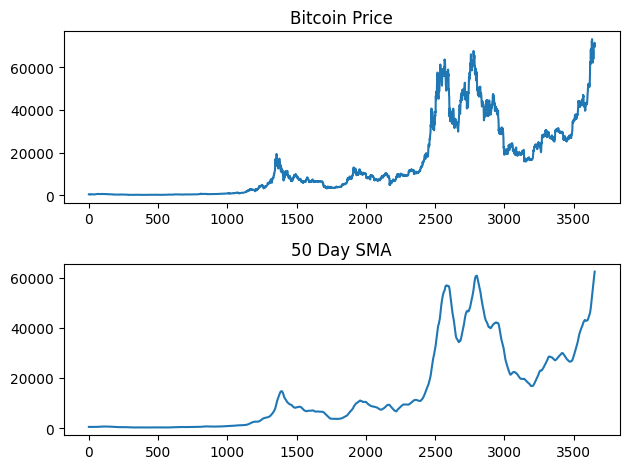

In [72]:
# 2 subplots
plt.subplot(2, 1, 1)
plt.plot(df['Price'])
plt.title('Bitcoin Price')

plt.subplot(2, 1, 2)
plt.plot(_50_day_sma)
plt.title('50 Day SMA')

plt.tight_layout()

## 50 day EMA

In [73]:
ema_indicator = EMAIndicator(
    close=df['Price'],
    window=50,
    fillna=True
)
_50_day_ema = ema_indicator.ema_indicator()

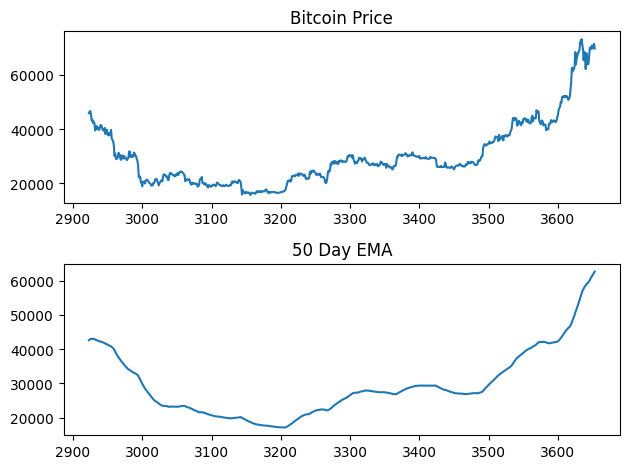

In [74]:
# 2 subplots
plt.subplot(2, 1, 1)
plt.plot(df['Price'][int(8 * len(_50_day_ema) / 10):])
plt.title('Bitcoin Price')

plt.subplot(2, 1, 2)
plt.plot(_50_day_ema[int(8 * len(_50_day_ema) / 10):])
plt.title('50 Day EMA')

plt.tight_layout()

## 

## OBV (On-Balance Volume)

In [62]:
obv_indicator = OnBalanceVolumeIndicator(
    close=df['Price'],
    volume=df['Vol.'],
    fillna=True
)

In [66]:
_obv = obv_indicator.on_balance_volume()

## MACD (Moving Average Convergence Divergence) and Signal

In [76]:
# MACD = EMA(12) - EMA(26)
# Signal = EMA(MACD, 9)

macd_indicator = MACD(
    close=df['Price'],
    window_slow=26,
    window_fast=12,
    window_sign=9,
    fillna=True
)

In [77]:
_macd = macd_indicator.macd()
_macd_signal = macd_indicator.macd_signal()

## Parabolic SAR

In [81]:
psar_indicator = PSARIndicator(
    high=df['High'],
    low=df['Low'],
    close=df['Price'],
    fillna=True
)

In [82]:
_psar = psar_indicator.psar()

## Analyzing all stuff

In [85]:
new_cols = [_50_day_sma, _50_day_ema, _obv, _macd, _macd_signal, _psar]
# in first capital letter and spaces
col_names = ["MA50", "EMA50", "OBV", "MACD", "MACD Signal", "PSAR"]

for col, name in zip(new_cols, col_names):
    df[name] = col

In [86]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,EPU,GPRD,Gold,MA50,EMA50,OBV,MACD,MACD Signal,PSAR
0,2014-04-01,463.5,444.7,487.4,438.0,3970.0,0.0423,111.578388,120.928154,1279.599976,463.50,463.500000,3970.0,0.000000,0.000000,463.50000
1,2014-04-02,424.4,463.5,480.3,409.3,4380.0,-0.0843,111.578388,94.748909,1290.500000,443.95,461.966667,-410.0,-3.119088,-0.623818,424.40000
2,2014-04-03,436.3,424.4,448.7,386.7,4020.0,0.0281,111.578388,63.297474,1284.400024,441.40,460.960131,3610.0,-4.577986,-1.414651,487.40000
3,2014-04-04,444.4,436.3,456.5,415.5,2570.0,0.0185,111.578388,59.551781,1303.199951,442.15,460.310714,6180.0,-5.022672,-2.136255,485.38600
4,2014-04-05,456.6,444.4,461.2,439.4,1160.0,0.0276,111.578388,60.448311,1303.199951,445.04,460.165196,7340.0,-4.340615,-2.577127,483.41228


In [92]:
df.to_csv("../data/Final_Btc_Data_with_Indicators.csv", index=False)